In [10]:
#For SVD, use np.linalg.svd to decompose:

import numpy as np
import random 
m = 3
n = 6
random_matrix = np.random.randint(-3, 3, size=(m, n))

u, s, vt = np.linalg.svd(random_matrix)
print(u)
print(s)
print(vt)

print(u.shape)
print(s.shape)
print(vt.shape)
        
# u is m x m 
# s is m x n
# vt is n x n
        



[[-0.89342052  0.23003735 -0.38585307]
 [-0.22080138 -0.97289168 -0.06876436]
 [-0.39121161  0.0237614   0.91999395]]
[5.44815117 3.63893005 2.0188702 ]
[[ 0.48270878 -0.30759861  0.163986   -0.0921797   0.60429207  0.5213616 ]
 [-0.73088978  0.07627521 -0.06321566  0.05668588  0.07117978  0.66910847]
 [ 0.04955075  0.72027158  0.19112327 -0.64682069  0.15173318  0.02873154]
 [ 0.05251867  0.38905703  0.65115012  0.64593651  0.06696964  0.01268924]
 [-0.20831279  0.19254399 -0.40206329  0.23681552  0.74319067 -0.38660542]
 [ 0.42916739  0.43856068 -0.5890101   0.31080064 -0.2234374   0.36059073]]
(3, 3)
(3,)
(6, 6)


{x: 1/2, y: 1}
[2.23606797749979, 2.22444689754554, 2.21291213875291, 2.20146331502261, 2.19010004311383, 2.17882194261716, 2.16762863592730, 2.15651974821571, 2.14549490740297, 2.13455374413108, 2.12369589173553, 2.11292098621721, 2.10222866621418, 2.09161857297319, 2.08109035032115, 2.07064364463627, 2.06027810481918, 2.04999338226369, 2.03978913082758, 2.02966500680303, 2.01962066888695, 2.00965577815114, 1.99976999801223, 1.98996299420148, 1.98023443473433, 1.97058398987987, 1.96101133213003, 1.95151613616868, 1.94209807884049, 1.93275683911962, 1.92349209807832, 1.91430353885520, 1.90519084662352, 1.89615370855914, 1.88719181380844, 1.87830485345600, 1.86949252049216, 1.86075450978040, 1.85209051802463, 1.84350024373626, 1.83498338720116, 1.82653965044655, 1.81816873720762, 1.80987035289420, 1.80164420455715, 1.79349000085478, 1.78540745201902, 1.77739626982169, 1.76945616754044, 1.76158685992482, 1.75378806316219, 1.74605949484349, 1.73840087392913, 1.73081192071467, 1.7232923567

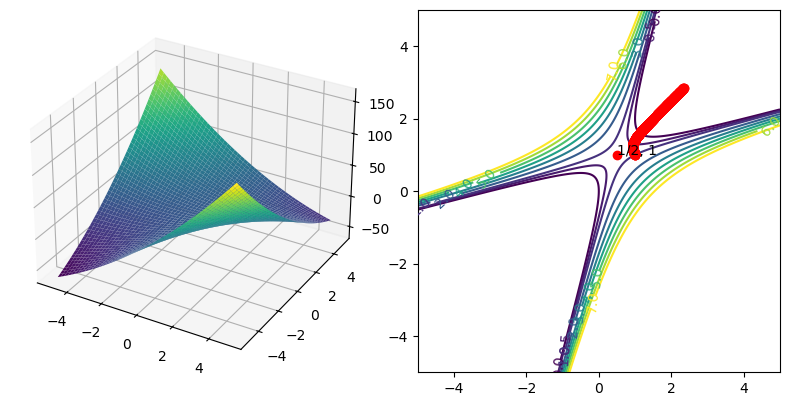

In [45]:
from sympy import symbols, Function, diff, solve
import matplotlib.pyplot as plt
import numpy as np

x = symbols('x')
y = symbols('y')
f = Function('f')(x, y)

f = x**2 + y**2 - 4*x*y + 3*x

fx = diff(f, x)
fy = diff(f, y)

def grad_iter(x0, y0, alpha, fx, fy):
    x1 = x0 - alpha * fx.subs({x: x0, y: y0})
    y1 = y0 - alpha * fy.subs({x: x0, y: y0})
    
    norm = ((fx.subs({x: x0, y: y0}))**2 + (fy.subs({x: x0, y: y0}))**2) **(1/2)
    
    return x1, y1, norm

x0 = 1
y0 = 1
alpha = .001

x_visited = []
y_visited = []
norms = []

for _ in range(1000):
    x0, y0, norm = grad_iter(x0, y0, alpha, fx, fy)
    x_visited.append(x0)
    y_visited.append(y0)
    norms.append(norm)
    
fig = plt.figure(figsize = (8,12))
ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
x_vals = np.linspace(-5, 5, 1000)
y_vals = np.linspace(-5, 5, 1000)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)
f_vals = x_vals**2 + y_vals**2 - 4*x_vals*y_vals + 3*x_vals
ax1.plot_surface(x_vals, y_vals, f_vals, cmap = 'viridis')


solutions = solve([fx, fy], [x, y])
print(solutions)
sol_xs = solutions[x]
sol_ys = solutions[y]

fxx = diff(fx, x)
fyy = diff(fy, y)
fxy = diff(fx, y)

disc = fxx * fyy - fxy**2

print(norms)


disc_val = disc.subs({x: sol_xs, y: sol_ys})
fxx_val = fxx.subs({x: sol_xs, y: sol_ys})
if disc_val < 0:
    print("Saddle")
elif disc_val > 0:
    if fxx_val > 0: 
        print("Minima")
    elif fxx_val < 0:
        print("Maxima")
else:
    print("Inconclusive")
        



ax2 = fig.add_subplot(1,2,2)
levels = [0, 1/2, 1, 2, 3, 4, 5, 6, 7]
cont2 = ax2.contour(x_vals, y_vals, f_vals, levels = levels)
ax2.clabel(cont2)
ax2.set_aspect('equal')
ax2.plot(sol_xs, sol_ys, 'ro')
ax2.text(sol_xs, sol_ys, f'{sol_xs}, {sol_ys}')

ax2.plot(x_visited, y_visited, 'ro', linestyle='-')

plt.tight_layout()
plt.show()
    

In [43]:
#Debug: Check the second derivative test calculation
print("Function: f(x,y) = x² + y² - 4xy + 3x")
print(f"\nFirst derivatives:")
print(f"fx = {fx}")
print(f"fy = {fy}")

print(f"\nSecond derivatives:")
print(f"fxx = {fxx}")
print(f"fyy = {fyy}")
print(f"fxy = {fxy}")

print(f"\nCritical point: ({sol_xs}, {sol_ys})")

#Correct discriminant formula: D = fxx*fyy - fxy²
disc_correct = fxx*fyy - fxy**2
disc_val_correct = disc_correct.subs({x: sol_xs, y: sol_ys})

print(f"\nYour discriminant formula: fxx + fyy - 2*fxy² = {disc.subs({x: sol_xs, y: sol_ys})}")
print(f"CORRECT discriminant formula: fxx*fyy - fxy² = {disc_val_correct}")

#Evaluate at critical point
fxx_val = fxx.subs({x: sol_xs, y: sol_ys})
fyy_val = fyy.subs({x: sol_xs, y: sol_ys})
fxy_val = fxy.subs({x: sol_xs, y: sol_ys})

print(f"\nAt critical point:")
print(f"fxx = {fxx_val}")
print(f"fyy = {fyy_val}")
print(f"fxy = {fxy_val}")
print(f"D = {disc_val_correct}")

print("\nCorrect classification:")
if disc_val_correct > 0:
    if fxx_val > 0:
        print("✓ LOCAL MINIMUM")
    else:
        print("✓ LOCAL MAXIMUM")
elif disc_val_correct < 0:
    print("✓ SADDLE POINT")
else:
    print("Inconclusive (need higher order test)")

Function: f(x,y) = x² + y² - 4xy + 3x

First derivatives:
fx = 2*x - 4*y + 3
fy = -4*x + 2*y

Second derivatives:
fxx = 2
fyy = 2
fxy = -4

Critical point: (1/2, 1)

Your discriminant formula: fxx + fyy - 2*fxy² = -28
CORRECT discriminant formula: fxx*fyy - fxy² = -12

At critical point:
fxx = 2
fyy = 2
fxy = -4
D = -12

Correct classification:
✓ SADDLE POINT


In [ ]:
#Analyze gradient behavior more carefully
alpha = 0.001
x0 = 1
y0 = 1

x_visited = [x0]
y_visited = [y0]
norms = []
gradients_x = []
gradients_y = []

for i in range(1000):
    grad_x = float(fx.subs({x: x0, y: y0}))
    grad_y = float(fy.subs({x: x0, y: y0}))
    norm = np.sqrt(grad_x**2 + grad_y**2)
    
    gradients_x.append(grad_x)
    gradients_y.append(grad_y)
    norms.append(norm)
    
    x0 = x0 - alpha * grad_x
    y0 = y0 - alpha * grad_y
    
    x_visited.append(x0)
    y_visited.append(y0)

print(f"Starting point: (1, 1)")
print(f"Target minimum: ({sol_xs}, {sol_ys})")
print(f"Final point after 1000 iterations: ({x_visited[-1]:.6f}, {y_visited[-1]:.6f})")
print(f"Distance from minimum: {np.sqrt((x_visited[-1]-float(sol_xs))**2 + (y_visited[-1]-float(sol_ys))**2):.6f}")

print(f"\nGradient norm at iteration 0: {norms[0]:.6f}")
print(f"Gradient norm at iteration 100: {norms[99]:.6f}")
print(f"Gradient norm at iteration 500: {norms[499]:.6f}")
print(f"Gradient norm at iteration 999: {norms[-1]:.6f}")

#Plot convergence
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

#Plot 1: Path on contour
ax1 = axes[0, 0]
cont = ax1.contour(x_vals, y_vals, f_vals, levels=levels)
ax1.clabel(cont)
ax1.set_aspect('equal')
ax1.plot(sol_xs, sol_ys, 'go', markersize=12, label='True minimum', zorder=5)
ax1.plot(x_visited[::10], y_visited[::10], 'ro-', linewidth=1, markersize=3, label='GD path (every 10th)', alpha=0.7)
ax1.plot([1], [1], 'bs', markersize=10, label='Start')
ax1.set_title('Gradient Descent Path')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend()
ax1.grid(True, alpha=0.3)

#Plot 2: Gradient norm over iterations
ax2 = axes[0, 1]
ax2.plot(norms)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Gradient Norm')
ax2.set_title('Gradient Norm vs Iteration')
ax2.grid(True)
ax2.set_yscale('log')

#Plot 3: Distance from minimum
distances = [np.sqrt((x_visited[i]-float(sol_xs))**2 + (y_visited[i]-float(sol_ys))**2) for i in range(len(x_visited))]
ax3 = axes[1, 0]
ax3.plot(distances)
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Distance from Minimum')
ax3.set_title('Distance from True Minimum vs Iteration')
ax3.grid(True)

#Plot 4: x and y coordinates over time
ax4 = axes[1, 1]
ax4.plot(x_visited, label='x(t)', alpha=0.7)
ax4.plot(y_visited, label='y(t)', alpha=0.7)
ax4.axhline(y=float(sol_xs), color='g', linestyle='--', alpha=0.5, label=f'x* = {sol_xs}')
ax4.axhline(y=float(sol_ys), color='orange', linestyle='--', alpha=0.5, label=f'y* = {sol_ys}')
ax4.set_xlabel('Iteration')
ax4.set_ylabel('Coordinate Value')
ax4.set_title('x and y Coordinates vs Iteration')
ax4.legend()
ax4.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#Compare different learning rates
alphas = [0.001, 0.005, 0.01, 0.02]
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

for idx, alpha in enumerate(alphas):
    x0 = 1
    y0 = 1
    
    x_visited = []
    y_visited = []
    norms = []
    
    for _ in range(100):
        x0, y0, norm = grad_iter(x0, y0, alpha, fx, fy)
        x_visited.append(x0)
        y_visited.append(y0)
        norms.append(norm)
    
    ax = axes[idx]
    cont = ax.contour(x_vals, y_vals, f_vals, levels=levels)
    ax.clabel(cont)
    ax.set_aspect('equal')
    ax.plot(sol_xs, sol_ys, 'go', markersize=10, label='True minimum')
    ax.plot(x_visited, y_visited, 'ro-', linewidth=1, markersize=3, label='GD path')
    ax.plot([1], [1], 'bs', markersize=8, label='Start')
    ax.set_title(f'α = {alpha}, Final norm = {norms[-1]:.4f}')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    #Print convergence info
    print(f"α = {alpha}: Final point = ({x_visited[-1]:.4f}, {y_visited[-1]:.4f}), Distance from min = {np.sqrt((x_visited[-1]-sol_xs)**2 + (y_visited[-1]-sol_ys)**2):.4f}")

plt.tight_layout()
plt.show()